In [1]:
# Import packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

bikes = pd.read_csv('bike_share_day.csv').dropna()

In [2]:
seed = 123

In [3]:
# Convert text features to strings
bikes['season'] = bikes['season'].astype(str)
bikes['month'] = bikes['month'].astype(str)
bikes['weekday'] = bikes['weekday'].astype(str)
bikes['weathersit'] = bikes['weathersit'].astype(str)

In [4]:
# Define input and output features
X = bikes[['temp', 'hum', 'windspeed', 'workingday', 'season']]
y = bikes[['total']]

In [5]:
# Test train split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

In [6]:
# Define and fit model
mlpModelTrain = MLPRegressor(max_iter=5000, tol=0.0001, random_state=seed)
mlpModelTrain = mlpModelTrain.fit(X_train, np.ravel(y_train))

In [7]:
# Loss score
mlpModelTrain.score(X_train, y_train)

0.5281091872399122

In [8]:
# Different fit
mlpModelVal = MLPRegressor(max_iter=5000, tol=0.0001, random_state=seed + 1)
mlpModelVal = mlpModelVal.fit(X_val, np.ravel(y_val))

In [9]:
# Loss score
mlpModelTrain.score(X_val, y_val)

0.2438167314371541

Text(0, 0.5, 'Loss')

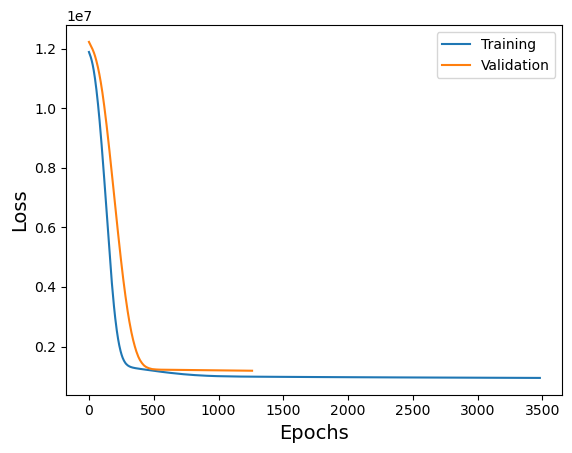

In [10]:
# Plots the loss curves for the training and validation sets
f, ax = plt.subplots(1, 1)
sns.lineplot(
    x=range(len(mlpModelTrain.loss_curve_)),
    y=mlpModelTrain.loss_curve_,
    label='Training',
)
sns.lineplot(
    x=range(len(mlpModelVal.loss_curve_)), y=mlpModelVal.loss_curve_, label='Validation'
)
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

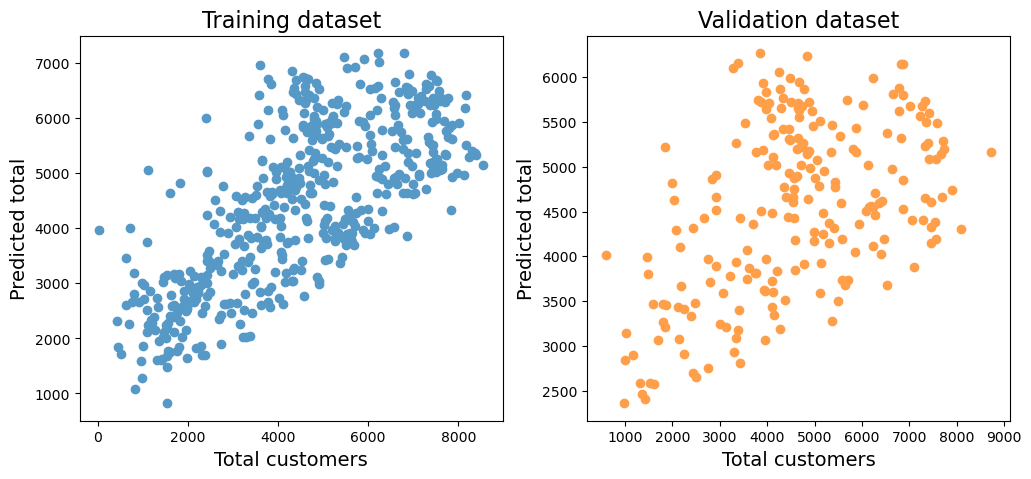

In [11]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 5)

plt.subplot(1, 2, 1)
p = plt.scatter(x=y_train, y=mlpModelTrain.predict(X_train), color='#5698c6')
plt.xlabel('Total customers', fontsize=14)
plt.ylabel('Predicted total', fontsize=14)
plt.title('Training dataset', fontsize=16)

plt.subplot(1, 2, 2)
p = plt.scatter(x=y_val, y=mlpModelVal.predict(X_val), color='#ff9f4a')
plt.xlabel('Total customers', fontsize=14)
plt.ylabel('Predicted total', fontsize=14)
plt.title('Validation dataset', fontsize=16)
plt.show()